In [134]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

In [135]:
n = 500
positions  = np.random.multivariate_normal(mean=[0,0,0],cov=[[1,0,0],[0,1,0],[0,0,1]],size=(n))
directions = np.random.multivariate_normal(mean=[0,0,0],cov=[[1,0,0],[0,1,0],[0,0,1]],size=(n))

In [136]:
in_range = np.where(((np.abs(positions[:,0])<2) & (np.abs(positions[:,1])<2) & (np.abs(positions[:,2])<2)))
positions = positions[in_range]
directions = directions[in_range]
for row in positions[:10]:
    print row

[-1.23488369  0.28407178  0.88483421]
[ 0.30057593  0.60784271 -1.10759545]
[ 0.08342513 -0.28544478  0.33775333]
[ 0.37826557 -1.33726981  0.82000688]
[ 0.96438588  1.57471135 -1.09253984]
[ 1.73328467  1.62322907  0.3561831 ]
[-0.27104006 -0.60295029  0.97350236]
[-1.46707093  0.79189261  1.075822  ]
[ 0.93795547 -0.99345635  0.0432048 ]
[-0.80984547  0.55230086  1.14926497]


In [137]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [138]:
ones = np.ones(len(positions))
zeros = np.zeros(len(positions))

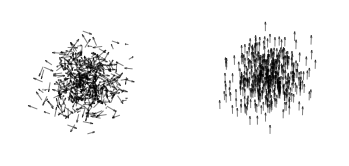

In [146]:
fig = plt.figure()

alpha = 0.5
color = 'Black'
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.quiver(positions[:,0],positions[:,1],positions[:,2],
          directions[:,0],directions[:,1],directions[:,2],length=0.5,
          pivot='tail',
          color=color,alpha=alpha)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_aspect('equal')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.quiver(positions[:,0],positions[:,1],positions[:,2],
          zeros,zeros,ones,length=0.5,pivot='tail',
          color=color,alpha=alpha)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_aspect('equal')


plt.savefig('below_curie.pdf')
plt.show()